<a href="https://colab.research.google.com/github/farhanadhilah/Applied_Deep_Learning/blob/main/Projek_UTS/LoadNewModel_and_DemoPrediction_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/farhanadhilah/Applied_Deep_Learning.git

Cloning into 'Applied_Deep_Learning'...
remote: Enumerating objects: 532, done.
remote: Counting objects: 100% (532/532), done.
remote: Compressing objects: 100% (519/519), done.
remote: Total 532 (delta 102), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (532/532), 187.41 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [2]:
%cd /content/Applied_Deep_Learning/Projek_UTS

/content/Applied_Deep_Learning/Projek_UTS


In [3]:
!pip install keras
!pip install tensorflow
!pip install rasterio

     |████████████████████████████████| 462 kB 23.7 MB/s 
     |████████████████████████████████| 19.3 MB 387 kB/s 


In [19]:
!python generate_parameters.py

Warning params file exists, continue? (y/n) y


In [20]:
!python TrainingClass.py

In [21]:
!python PostProcessing.py

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
!python train.py

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
I will train on all these parameter files:

parameters.txt
Warning, folder exists! Delete? (y/n) y
Data loaded succesfully.
/content/Applied_Deep_Learning/Projek_UTS/XNet.py
2022-04-16 01:02:57.752826: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
Model loaded and compiled succesfully.
/content/Applied_Deep_Learning/Projek_UTS/TrainingClass.py:373: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model.fit_generator(self.

Diperoleh akurasi model sebesar 80.72% dengan 120 data training 120 dan 20 data validasi.

#**Demo Prediction**

In [34]:
from keras.models import Model, Sequential, load_model
model = load_model("/content/Applied_Deep_Learning/Projek_UTS/Model0/DLs200_64.h5")

In [35]:
import h5py
with h5py.File("/content/Applied_Deep_Learning/Projek_UTS/Model0/DLs200_64.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['model_weights', 'optimizer_weights']>


In [44]:
import os
import cv2
import numpy as np

data_dir = '/content/Applied_Deep_Learning/Projek_UTS/dataset/images'
image_list = sorted(os.listdir(data_dir))[140:150]

testing_image = []
for img_name in image_list:
  img = cv2.imread(data_dir + '/' + img_name, 0)
  img = cv2.resize(img, (200,200))
  testing_image.append(img)

testing_image = np.asarray(testing_image)
n, h, w = testing_image.shape
testing_image = testing_image.reshape(n, h, w, 1)
testing_image.shape

(10, 200, 200, 1)

In [51]:
testing_images = np.empty([5,200,200,1])
for i in range(5):
  testing_images[i]=testing_image[i]
testing_images = testing_images.reshape((5,200,200,1))

In [52]:
prediction = model.predict(testing_images)
prediction = prediction.reshape((5,200,200,3))

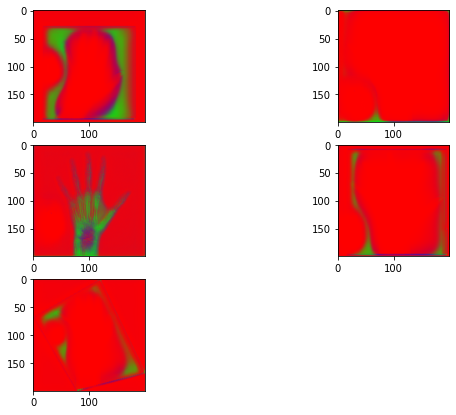

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
for i in range(5):
  fig.add_subplot(3,2,i+1)
  plt.imshow(prediction[i])